# Experimenting with masking
We need to mask out the galaxies in the cutouts to try to prevent the model from learning galaxy features rather than ICL. Trying out a couple of different strategies to perform this masking. 

In [1]:
from astropy.visualization import ImageNormalize, LogStretch
import h5py
import matplotlib.pyplot as plt
import numpy as np

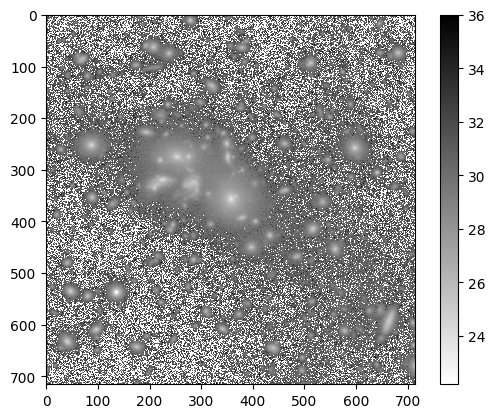

In [5]:
# Surface brightness cut -> literature uses cut of 26.5 mag, so figure out what that corresponds to in pixel value
cutouts = h5py.File('../processed/cutouts.hdf')
cutout = cutouts['0']

img = cutout['HDU0']['DATA']
img = np.array(img)
img[img<=0] = np.nan
img_ab = 2.5 * np.log10(63095734448.0194 / np.abs(img))
plt.imshow(img_ab, vmax=36, cmap='gray_r', interpolation='none')
plt.colorbar()
plt.show()

In [4]:
# What value does magnitude 26.5 correspond to?
63095734448.0194 / (10**(26.5/2.5))

1.5848931924611167

In [7]:
# What value is that in the arcsinh stretched image?
stddev = 0.017359
np.arcsinh(63095734448.0194 / (10**(26.5/2.5)) / stddev)

5.2073383637996065

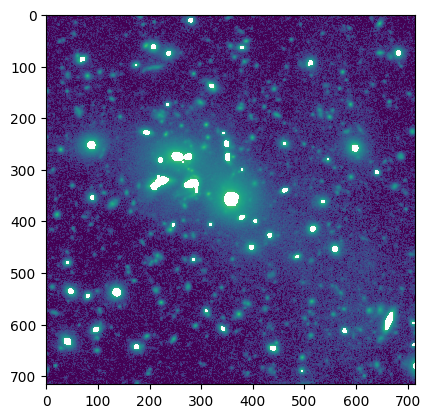

In [42]:
# Brightness threshold?
cutouts = h5py.File('../processed/cutouts.hdf')
cutout = cutouts['0']

img = np.array(cutout['HDU0']['DATA'])
img[img > 1.5] = np.nan 
norm = ImageNormalize(vmin=0, vmax=10, stretch=LogStretch())
plt.imshow(img, norm=norm)
plt.show()

In [ ]:
# Detect sources? 

# Get BCG info from catalogue and use to produce mask of an appropriate size? 

# Use CAMIRA richness info somehow to produce a mask? 